In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import sqlite3

conn = sqlite3.connect('movie.db')
db_data = pd.read_sql_query("select * from movie250", conn)
db_data.head()

,id,info_link,pic_link,cname,ename,score,rated,instr,info
0,1,https://movie.douban.com/subject/1292052/,https://img2.doubanio.com/view/photo/s_ratio_p...,肖申克的救赎,The Shawshank Redemption,9.7,2598133,希望让人自由,导演: 弗兰克·德拉邦特 Frank Darabont 主演: 蒂姆·罗宾斯 Tim R...
1,2,https://movie.douban.com/subject/1291546/,https://img3.doubanio.com/view/photo/s_ratio_p...,霸王别姬,,9.6,1929614,风华绝代,导演: 陈凯歌 Kaige Chen 主演: 张国荣 Leslie Cheung 张...
2,3,https://movie.douban.com/subject/1292720/,https://img2.doubanio.com/view/photo/s_ratio_p...,阿甘正传,Forrest Gump,9.5,1952565,一部美国近现代史,导演: 罗伯特·泽米吉斯 Robert Zemeckis 主演: 汤姆·汉克斯 Tom ...
3,4,https://movie.douban.com/subject/1292722/,https://img9.doubanio.com/view/photo/s_ratio_p...,泰坦尼克号,Titanic,9.4,1913757,失去的才是永恒的,导演: 詹姆斯·卡梅隆 James Cameron 主演: 莱昂纳多·迪卡普里奥 Leo...
4,5,https://movie.douban.com/subject/1295644/,https://img2.doubanio.com/view/photo/s_ratio_p...,这个杀手不太冷,Léon,9.4,2106540,怪蜀黍和小萝莉不得不说的故事,导演: 吕克·贝松 Luc Besson 主演: 让·雷诺 Jean Reno 娜塔...


In [9]:
datas = pd.read_csv('HollywoodsMostProfitableStories.csv')

In [10]:
datas.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience  score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

# 查询相关

In [11]:
datas.set_index('Year', inplace=True)
datas.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross
Year,,,,,,,
2008,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654
2009,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000
2011,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895
2009,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000
2007,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143


In [21]:
# datas.loc[ (datas['Audience  score %']>=80) & (datas['Rotten Tomatoes %']>=90) , :]
datas.loc[ (datas['Audience  score %']>=80) & (datas['Rotten Tomatoes %']>=90) , :]

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross
Year,,,,,,,
2007,Enchanted,Comedy,Disney,80.0,4.005737,93.0,340.487652
2007,Knocked Up,Comedy,Universal,83.0,6.636402,91.0,219.001261
2011,Midnight in Paris,Romance,Sony,84.0,8.744706,93.0,148.660000
2008,WALL-E,Animation,Disney,89.0,2.896019,96.0,521.283432


In [11]:
datas.loc[lambda df:(datas['Audience  score %']>=80) & (datas['Rotten Tomatoes %']<=80) , :]

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross
Year,,,,,,,
2011,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895
2007,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143
2007,P.S. I Love You,Romance,Independent,82.0,5.103117,21.0,153.093505
2008,Sex and the City,Comedy,Warner Bros.,81.0,7.221796,49.0,415.253258
2008,The Curious Case of Benjamin Button,Fantasy,Warner Bros.,81.0,1.783944,73.0,285.431000
2008,Twilight,Romance,Summit,82.0,10.180027,49.0,376.661000


# 新增数据列的方式

In [17]:
datas.dtypes

Film                  object
Genre                 object
Lead Studio           object
Audience  score %    float64
Profitability        float64
Rotten Tomatoes %    float64
Worldwide Gross      float64
dtype: object

In [33]:
datas.loc[datas['Film'] == 'Something Borrowed']

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,分差
Year,,,,,,,,
2011,Something Borrowed,Romance,Independent,0,1.719514,0,60.183,0


In [26]:
datas.loc[datas['Film']=='Something Borrowed', ['Audience  score %', 'Rotten Tomatoes %']] = [0, 0]

In [30]:
datas.loc[:, 'Audience  score %'] = datas['Audience  score %'].astype('int32')
datas.loc[:, 'Rotten Tomatoes %'] = datas['Rotten Tomatoes %'].astype('int32')
datas.dtypes

Film                  object
Genre                 object
Lead Studio           object
Audience  score %      int32
Profitability        float64
Rotten Tomatoes %      int32
Worldwide Gross      float64
dtype: object

In [32]:
datas.loc[:, "分差"] = datas['Audience  score %'] - datas['Rotten Tomatoes %']
datas.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,分差
Year,,,,,,,,
2008,27 Dresses,Comedy,Fox,71,5.343622,40,160.308654,31
2009,(500) Days of Summer,Comedy,Fox,81,8.096000,87,60.720000,-6
2011,A Dangerous Method,Drama,Independent,89,0.448645,79,8.972895,10
2009,A Serious Man,Drama,Universal,64,4.382857,89,30.680000,-25
2007,Across the Universe,Romance,Independent,84,0.652603,54,29.367143,30


In [34]:
#对某列的值进行计数：
datas['Genre'].value_counts()

Comedy       41
Romance      15
Drama        13
Animation     3
Action        1
Fantasy       1
Name: Genre, dtype: int64

# 内置统计函数

In [36]:
datas = pd.read_csv('HollywoodsMostProfitableStories.csv')

In [37]:
datas.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
count,73.000000,71.000000,73.000000,74.000000,74.000000
mean,64.136986,4.741610,47.356164,136.351979,2009.054054
std,13.647665,8.292017,26.242655,157.067561,1.353756
min,35.000000,0.005000,3.000000,0.025000,2007.000000
25%,52.000000,1.790680,27.000000,32.447500,2008.000000
50%,64.000000,2.642353,45.000000,73.198612,2009.000000
75%,76.000000,4.850958,65.000000,190.185250,2010.000000
max,89.000000,66.934000,96.000000,709.820000,2011.000000


In [38]:
datas.cov()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
Audience score %,186.258752,4.745558,215.603311,851.959076,-3.364916
Profitability,4.745558,68.757551,5.215481,193.237626,-1.821011
Rotten Tomatoes %,215.603311,5.215481,688.676941,81.830037,-2.343227
Worldwide Gross,851.959076,193.237626,81.830037,24670.218767,-26.912686
Year,-3.364916,-1.821011,-2.343227,-26.912686,1.832655


In [39]:
datas.corr()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
Audience score %,1.000000,0.042083,0.601990,0.395357,-0.183528
Profitability,0.042083,1.000000,0.024210,0.146705,-0.162404
Rotten Tomatoes %,0.601990,0.024210,1.000000,0.019748,-0.066465
Worldwide Gross,0.395357,0.146705,0.019748,1.000000,-0.126570
Year,-0.183528,-0.162404,-0.066465,-0.126570,1.000000


In [40]:
datas['Audience  score %'].cov(datas['Year'])

-3.3649162861491626

# 排序函数：

serise排序：

In [25]:
datas['Rotten Tomatoes %'].sort_values(ascending=False, inplace=False)

Year
2008    96.0
2011    93.0
2007    93.0
2007    91.0
2009    89.0
        ... 
2007     8.0
2011     8.0
2011     6.0
2007     3.0
2011     NaN
Name: Rotten Tomatoes %, Length: 74, dtype: float64

DF排序

In [26]:
# 指定单列
datas.sort_values(by='Rotten Tomatoes %', ascending=False)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross
Year,,,,,,,
2008,WALL-E,Animation,Disney,89.0,2.896019,96.0,521.283432
2011,Midnight in Paris,Romance,Sony,84.0,8.744706,93.0,148.660000
2007,Enchanted,Comedy,Disney,80.0,4.005737,93.0,340.487652
2007,Knocked Up,Comedy,Universal,83.0,6.636402,91.0,219.001261
2010,Tangled,Animation,Disney,88.0,1.365692,89.0,355.080000
...,...,...,...,...,...,...,...
2007,License to Wed,Comedy,Warner Bros.,55.0,1.980206,8.0,69.307224
2011,New Year's Eve,Romance,Warner Bros.,48.0,2.536429,8.0,142.040000
2011,Waiting For Forever,Romance,Independent,53.0,0.005000,6.0,0.025000


In [27]:
# 指定多列,越靠前优先级越高：
datas.sort_values(by=['Rotten Tomatoes %','Audience  score %'], ascending=[False, False])

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross
Year,,,,,,,
2008,WALL-E,Animation,Disney,89.0,2.896019,96.0,521.283432
2011,Midnight in Paris,Romance,Sony,84.0,8.744706,93.0,148.660000
2007,Enchanted,Comedy,Disney,80.0,4.005737,93.0,340.487652
2007,Knocked Up,Comedy,Universal,83.0,6.636402,91.0,219.001261
2010,Tangled,Animation,Disney,88.0,1.365692,89.0,355.080000
...,...,...,...,...,...,...,...
2007,License to Wed,Comedy,Warner Bros.,55.0,1.980206,8.0,69.307224
2011,New Year's Eve,Romance,Warner Bros.,48.0,2.536429,8.0,142.040000
2011,Waiting For Forever,Romance,Independent,53.0,0.005000,6.0,0.025000


# 字符串操作

In [28]:
datas['Lead Studio'].str

In [39]:
# 对str使用startswith、contains等得到bool的Serise，可用作条件查询
condiction = datas['Lead Studio'].str.startswith('Sony', na=False)

In [40]:
condiction

Year
2008    False
2009    False
2011    False
2009    False
2007    False
        ...  
2008    False
2010    False
2010    False
2010    False
2008    False
Name: Lead Studio, Length: 74, dtype: bool

In [41]:
datas[condiction].head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross
Year,,,,,,,
2010,Dear John,Drama,Sony,66.0,4.598800,29.0,114.970000
2008,Made of Honor,Comedy,Sony,61.0,2.649068,13.0,105.962734
2011,Midnight in Paris,Romance,Sony,84.0,8.744706,93.0,148.660000
2008,Nick and Norah's Infinite Playlist,Comedy,Sony,67.0,3.352729,73.0,33.527293


Apply方法：

In [2]:
pokemon = pd.read_excel('pokemon.xlsx')
pokemon.set_index('#', inplace=True, drop=False)
pokemon

,#,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
#,,,,,,,,,,
001,001,Bulbasaur,GRASS,318,45,49,49,65,65,45
001,001,Bulbasaur,POISON,318,45,49,49,65,65,45
002,002,Ivysaur,GRASS,405,60,62,63,80,80,60
002,002,Ivysaur,POISON,405,60,62,63,80,80,60
003,003,Venusaur,GRASS,525,80,82,83,100,100,80
...,...,...,...,...,...,...,...,...,...,...
716,716,Xerneas,FAIRY,680,126,131,95,131,98,99
717,717,Yveltal,DARK,680,126,131,95,131,98,99
717,717,Yveltal,FLYING,680,126,131,95,131,98,99


In [10]:
pokemon['攻击与特攻的差值'] = pokemon.apply(lambda x : x['Attack']-x['Special Attack'],axis = 1)
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries,  001 to  718
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   #                1168 non-null   object
 1   Name             1168 non-null   object
 2   Type             1168 non-null   object
 3   Total            1168 non-null   int64 
 4   HP               1168 non-null   int64 
 5   Attack           1168 non-null   int64 
 6   Defense          1168 non-null   int64 
 7   Special Attack   1168 non-null   int64 
 8   Special Defense  1168 non-null   int64 
 9   Speed            1168 non-null   int64 
 10  攻击与特攻的差值         1168 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 149.5+ KB


# 聚合操作

In [4]:
# 单列聚合
pokemon.groupby(['Type']).mean()

,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,攻击与特攻的差值
Type,,,,,,,,
BUG,377.197183,56.619718,70.380282,71.549296,53.830986,64.309859,60.507042,16.549296
DARK,455.938776,70.346939,95.938776,69.653061,75.510204,67.387755,77.102041,20.428571
DRAGON,522.454545,82.727273,102.568182,84.000000,91.295455,83.977273,77.886364,11.272727
ELECTRIC,446.607843,63.333333,69.627451,66.411765,89.862745,73.607843,83.764706,-20.235294
FAIRY,395.647059,69.441176,57.029412,63.970588,72.529412,79.676471,53.000000,-15.500000
FIGHTING,464.862745,74.882353,102.666667,73.254902,67.215686,72.117647,74.725490,35.450980
FIRE,458.790323,70.080645,82.467742,67.112903,89.629032,73.016129,76.483871,-7.161290
FLYING,448.780000,70.830000,79.030000,67.310000,74.930000,70.770000,85.910000,4.100000
GHOST,434.911111,62.755556,77.977778,80.888889,76.044444,75.066667,62.177778,1.933333


In [5]:
pokemon.groupby(['Type']).agg([np.sum, np.mean, np.std, np.size])

Total                                 HP                             \
            sum        mean         std size   sum       mean        std size   
Type                                                                            
BUG       26781  377.197183  116.040463   71  4020  56.619718  16.394569   71   
DARK      22341  455.938776  110.911641   49  3447  70.346939  20.440514   49   
DRAGON    22988  522.454545  140.238245   44  3640  82.727273  27.005911   44   
ELECTRIC  22777  446.607843  108.346865   51  3230  63.333333  20.525756   51   
FAIRY     13452  395.647059  126.217677   34  2361  69.441176  27.731605   34   
FIGHTING  23708  464.862745  113.101197   51  3819  74.882353  22.379139   51   
FIRE      28445  458.790323  111.549612   62  4345  70.080645  19.939497   62   
FLYING    44878  448.780000  117.756432  100  7083  70.830000  21.213230  100   
GHOST     19571  434.911111  105.938409   45  2824  62.755556  29.349892   45   
GRASS     38589  414.935484  101.490394   93  6145  66.075269  19.050982   93   
GROUND    26503  427.467742  110.858456   62  4659  75.145161  25.044123   62   
ICE       17183  464.405405  116.910094   37  2908  78.594595  26.636920   37   
NORMAL    39837  398.370000  113.361374  100  7681  76.810000  36.083432  100   
POISON    24092  394.950820   98.808304   61  3816  62.557377  18.934558   61   
PSYCHIC   38654  465.710843  132.285218   83  5878  70.819277  26.428987   83   
ROCK      24730  441.607143   94.436256   56  3729  66.589286  22.035324   56   
STEEL     22779  484.659574  101.401543   47  3038  64.638298  17.324807   47   
WATER     51511  422.221311  106.344949  122  8583  70.352459  27.193194  122   

         Attack              ... Special Defense      Speed             \
            sum        mean  ...             std size   sum       mean   
Type                         ...                                         
BUG        4997   70.380282  ...       31.685324   71  4296  60.507042   
DARK       4701   95.938776  ...       25.886625   49  3778  77.102041   
DRAGON     4513  102.568182  ...       28.174282   44  3427  77.886364   
ELECTRIC   3551   69.627451  ...       22.350909   51  4272  83.764706   
FAIRY      1939   57.029412  ...       34.421382   34  1802  53.000000   
FIGHTING   5236  102.666667  ...       23.553893   51  3811  74.725490   
FIRE       5113   82.467742  ...       22.985735   62  4742  76.483871   
FLYING     7903   79.030000  ...       26.834643  100  8591  85.910000   
GHOST      3509   77.977778  ...       27.520571   45  2798  62.177778   
GRASS      6810   73.225806  ...       20.477539   93  5587  60.075269   
GROUND     5515   88.951613  ...       20.428753   62  3712  59.870968   
ICE        2998   81.027027  ...       31.930880   37  2468  66.702703   
NORMAL     7240   72.400000  ...       24.391587  100  7153  71.530000   
POISON     4199   68.836066  ...       23.101534   61  3901  63.950820   
PSYCHIC    5755   69.337349  ...       28.692529   83  6354  76.554217   
ROCK       4992   89.142857  ...       35.557668   56  2804  50.071429   
STEEL      4341   92.361702  ...       28.356802   47  2712  57.702128   
WATER      8745   71.680328  ...       26.674295  122  7901  64.762295   

                         攻击与特攻的差值                             
                std size      sum       mean        std size  
Type                                                          
BUG       31.282982   71     1175  16.549296  36.053052   71  
DARK      24.281547   49     1001  20.428571  29.037332   49  
DRAGON    22.881104   44      496  11.272727  34.609693   44  
ELECTRIC  27.232031   51    -1032 -20.235294  26.803424   51  
FAIRY     25.580532   34     -527 -15.500000  31.064205   34  
FIGHTING  26.754498   51     1808  35.450980  36.535087   51  
FIRE      24.663467   62     -444  -7.161290  37.396938   62  
FLYING    24.158607  100      410   4.100000  30.728035  100  
GHOST     26.805095   45       87   1.933333  43.457607   45

In [6]:
group_result = pokemon.groupby(['Type'])
for name, group in group_result:
    print(name)
    print(group)
    print()

BUG
         #        Name Type  Total  HP  Attack  Defense  Special Attack  \
#                                                                         
 010   010    Caterpie  BUG    195  45      30       35              20   
 011   011     Metapod  BUG    205  50      20       55              25   
 012   012  Butterfree  BUG    385  60      45       50              80   
 013   013      Weedle  BUG    195  40      35       30              20   
 014   014      Kakuna  BUG    205  45      25       50              25   
...    ...         ...  ...    ...  ..     ...      ...             ...   
 637   637   Volcarona  BUG    550  85      60       65             135   
 649   649    Genesect  BUG    600  71     120       95             120   
 664   664  Scatterbug  BUG    200  38      35       40              27   
 665   665      Spewpa  BUG    213  45      22       60              27   
 666   666    Vivillon  BUG    411  80      52       50              90   

      Special Defens

In [62]:
group_result.get_group('BUG')

,#,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
#,,,,,,,,,,
010,010,Caterpie,BUG,195,45,30,35,20,20,45
011,011,Metapod,BUG,205,50,20,55,25,25,30
012,012,Butterfree,BUG,385,60,45,50,80,80,70
013,013,Weedle,BUG,195,40,35,30,20,20,50
014,014,Kakuna,BUG,205,45,25,50,25,25,35
...,...,...,...,...,...,...,...,...,...,...
637,637,Volcarona,BUG,550,85,60,65,135,105,100
649,649,Genesect,BUG,600,71,120,95,120,95,99
664,664,Scatterbug,BUG,200,38,35,40,27,25,35


<AxesSubplot:xlabel='#'>

F:\AIAbnou\ANACONDA\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25915 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\AIAbnou\ANACONDA\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\AIAbnou\ANACONDA\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19982 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\AIAbnou\ANACONDA\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\AIAbnou\ANACONDA\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\AIAbnou\ANACONDA\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py

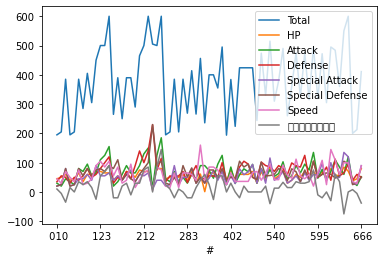

In [7]:
group_result.get_group('BUG').plot()

In [8]:
# 最大显示行数
pd.set_option('display.max_rows', 100000)
# 最大显示列数
pd.set_option('display.max_columns', 1000)
# 自动对齐
pd.set_option('display.unicode.east_asian_width', True)

query查询

In [3]:
HPdf = pokemon.query("HP > 80", inplace = False)
HPdf

,#,Name,Type,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed
#,,,,,,,,,,
018,018,Pidgeot,NORMAL,469,83,80,75,70,70,91
018,018,Pidgeot,FLYING,469,83,80,75,70,70,91
031,031,Nidoqueen,POISON,495,90,82,87,75,85,76
031,031,Nidoqueen,GROUND,495,90,82,87,75,85,76
034,034,Nidoking,POISON,495,81,92,77,85,75,85
...,...,...,...,...,...,...,...,...,...,...
716,716,Xerneas,FAIRY,680,126,131,95,131,98,99
717,717,Yveltal,DARK,680,126,131,95,131,98,99
717,717,Yveltal,FLYING,680,126,131,95,131,98,99
